In [1]:
import pandas as pd
df1 = pd.read_csv('turistas-por-categorias.csv')
df2 = pd.read_csv('turistas-por-zonas.csv')

In [2]:
df1.tail(30)

,annio,mes,procedencia,estrella_1,estrellas_2,estrellas_3,estrellas_4,estrellas_5,hoteleros,extrahoteleros
10873,2024,4,Dinamarca,1,116,619,1623,365,2724,1058
10874,2024,4,Finlandia,7,44,459,966,158,1634,820
10875,2024,4,Suiza,25,191,396,2044,1313,3969,629
10876,2024,4,Austria,16,85,245,1059,395,1800,349
10877,2024,4,Rusia,3,20,74,231,194,522,155
10878,2024,4,Países del Este,13,396,2300,8807,1460,12976,5243
10879,2024,4,Resto de Europa,174,809,1827,7403,2128,12341,4423
10880,2024,4,Estados Unidos,29,74,358,967,703,2131,300
10881,2024,4,Resto de América,79,370,281,654,298,1682,399
10882,2024,4,Resto del Mundo,60,176,948,2308,1308,4800,962


In [3]:
df1['fecha'] = pd.to_datetime(df1['annio'].astype(str) + '-' + df1['mes'].astype(str))
# Reordenar las columnas para poner 'fecha' en la tercera posición
cols = list(df1.columns)
fecha_index = cols.index('fecha')
# Mover 'fecha' a la tercera posición (índice 2)
new_cols = cols[:2] + ['fecha'] + cols[2:fecha_index] + cols[fecha_index+1:]
df1 = df1[new_cols]
df1['total'] = df1['hoteleros'] + df1['extrahoteleros']
# Eliminar datos de 2024
df1 = df1.loc[df1['annio'] != 2024]

In [4]:
df2 = df2[df2['mes'] != 13]
df2['fecha'] = pd.to_datetime(df2['annio'].astype(str) + '-' + df2['mes'].astype(str))
# Reordenar las columnas para poner 'fecha' en la tercera posición
cols = list(df2.columns)
fecha_index = cols.index('fecha')
# Mover 'fecha' a la tercera posición (índice 2)
new_cols = cols[:2] + ['fecha'] + cols[2:fecha_index] + cols[fecha_index+1:]
df2 = df2[new_cols]

In [5]:
df1.head()

,annio,mes,fecha,procedencia,estrella_1,estrellas_2,estrellas_3,estrellas_4,estrellas_5,hoteleros,extrahoteleros,total
0,1978,1,1978-01-01,España,1028,3192,4046,3075,4323,15664,4653,20317
1,1978,1,1978-01-01,Holanda,42,457,872,1226,201,2798,2334,5132
2,1978,1,1978-01-01,Bélgica,0,1330,713,1791,357,4191,932,5123
3,1978,1,1978-01-01,Alemania,652,3004,4826,6572,1451,16505,7529,24034
4,1978,1,1978-01-01,Francia,61,644,2070,2964,454,6193,362,6555


In [6]:
df2.head(2)

,annio,mes,fecha,procedencia,hotel_zona_1,extrahoteleros_zona_1,hotel_zona_2,extrahoteleros_zona_2,hotel_zona_3,extrahoteleros_zona_3,hotel_zona_4,extrahoteleros_zona_4
0,1978,1,1978-01-01,España,10693,298,644,135.0,3775,2717,552,1503
1,1978,1,1978-01-01,Holanda,145,0,79,0.0,1413,980,1161,1354


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df_agg_annio = df1.copy()

df_agg_annio.drop('fecha', axis=1, inplace=True)
df_agg_annio.drop('procedencia', axis=1, inplace=True)

df_agg_annio = df_agg_annio.groupby(['annio']).sum().reset_index()
df_agg_annio = df_agg_annio.loc[df_agg_annio['annio'] != 2024]


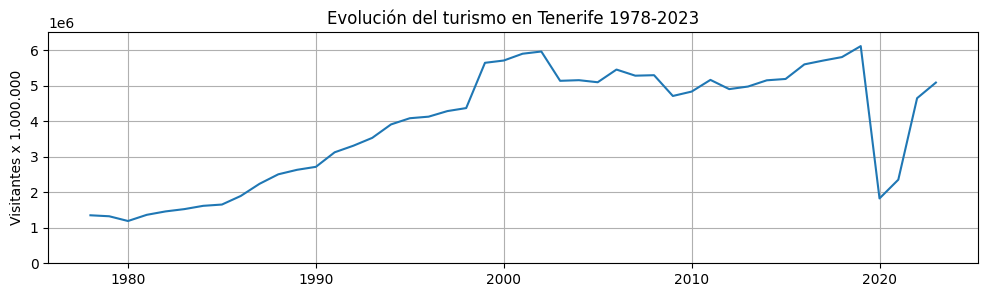

In [8]:
# Crear el gráfico de línea
from matplotlib.dates import YearLocator
plt.figure(figsize=(12, 3))  # Ajustar el tamaño del gráfico
sns.lineplot(data=df_agg_annio, x='annio', y='total')
plt.title('Evolución del turismo en Tenerife 1978-2023')  # Título del gráfico
plt.ylabel('Visitantes x 1.000.000')  # Etiqueta del eje Y
plt.xlabel('')  # Etiqueta del eje Y
#limites de Y
plt.ylim(0, 6500000)
plt.xticks(rotation=0)  # Rotar las etiquetas del eje X para mejor lectura

plt.grid(True)
plt.show()  # Mostrar el gráfico

In [9]:
df_agg_annio = df1.copy()
df_agg_annio.drop(columns=['fecha', 'mes', 'procedencia'], inplace=True) 
df_agg_annio = df_agg_annio.groupby(['annio']).sum().reset_index()
df_agg_annio.head(5)

,annio,estrella_1,estrellas_2,estrellas_3,estrellas_4,estrellas_5,hoteleros,extrahoteleros,total
0,1978,32098,141897,295572,385190,91454,946211,404174,1350385
1,1979,36024,150689,290591,365786,74243,917333,405528,1322861
2,1980,28509,134153,265681,329550,59658,817551,371984,1189535
3,1981,23584,122885,308363,414637,63116,932585,431015,1363600
4,1982,23293,158863,328906,455108,78163,1044333,415119,1459452


In [10]:
df_agg_annio

,annio,estrella_1,estrellas_2,estrellas_3,estrellas_4,estrellas_5,hoteleros,extrahoteleros,total
0,1978,32098,141897,295572,385190,91454,946211,404174,1350385
1,1979,36024,150689,290591,365786,74243,917333,405528,1322861
2,1980,28509,134153,265681,329550,59658,817551,371984,1189535
3,1981,23584,122885,308363,414637,63116,932585,431015,1363600
4,1982,23293,158863,328906,455108,78163,1044333,415119,1459452
5,1983,27030,167601,329576,473126,82699,1080032,444059,1524091
6,1984,26570,165398,348000,520750,85725,1146443,469949,1616392
7,1985,25461,151730,323527,576744,76704,1154166,498591,1652757
8,1986,16899,150449,332892,675148,67540,1242928,650858,1893786
9,1987,12687,178094,419130,734348,64526,1408785,827276,2236061


In [11]:
df_agg_annio_procedencia = df1.copy()
df_agg_annio_procedencia.drop(columns=['fecha', 'mes'], inplace=True) 
df_agg_annio_procedencia = df_agg_annio_procedencia.groupby(['annio', 'procedencia']).sum().reset_index()
df_agg_annio_procedencia.head(5)

,annio,procedencia,estrella_1,estrellas_2,estrellas_3,estrellas_4,estrellas_5,hoteleros,extrahoteleros,total
0,1978,Alemania,5131,27222,37768,51624,12552,134297,75205,209502
1,1978,Austria,958,703,2630,3615,565,8471,6668,15139
2,1978,Bélgica,76,7911,7205,20082,2599,37873,8913,46786
3,1978,Canada,27,215,421,1929,482,3074,328,3402
4,1978,Dinamarca,1752,8861,6225,9291,2094,28223,22194,50417


In [12]:
df_agg_mes_procedencia = df1.copy()
df_agg_mes_procedencia.drop(columns=['fecha', 'annio'], inplace=True) 
df_agg_mes_procedencia = df_agg_mes_procedencia.groupby(['mes', 'procedencia']).sum().reset_index()
df_agg_mes_procedencia.head(5)

,mes,procedencia,estrella_1,estrellas_2,estrellas_3,estrellas_4,estrellas_5,hoteleros,extrahoteleros,total
0,1,Alemania,20385,58168,359639,901478,136374,1476044,639107,2115151
1,1,Austria,1556,3358,17447,45515,10101,77977,45031,123008
2,1,Bélgica,3266,20164,50995,223089,46076,343590,111184,454774
3,1,Canada,71,242,619,1019,356,2307,1136,3443
4,1,Dinamarca,3804,31932,66938,73838,10353,186865,316624,503489


In [13]:
df_solo_hoteles = df_agg_annio.copy()
df_solo_hoteles.drop(columns=['hoteleros', 'total'], inplace=True)

In [14]:
df_solo_hoteles.head(3)

,annio,estrella_1,estrellas_2,estrellas_3,estrellas_4,estrellas_5,extrahoteleros
0,1978,32098,141897,295572,385190,91454,404174
1,1979,36024,150689,290591,365786,74243,405528
2,1980,28509,134153,265681,329550,59658,371984


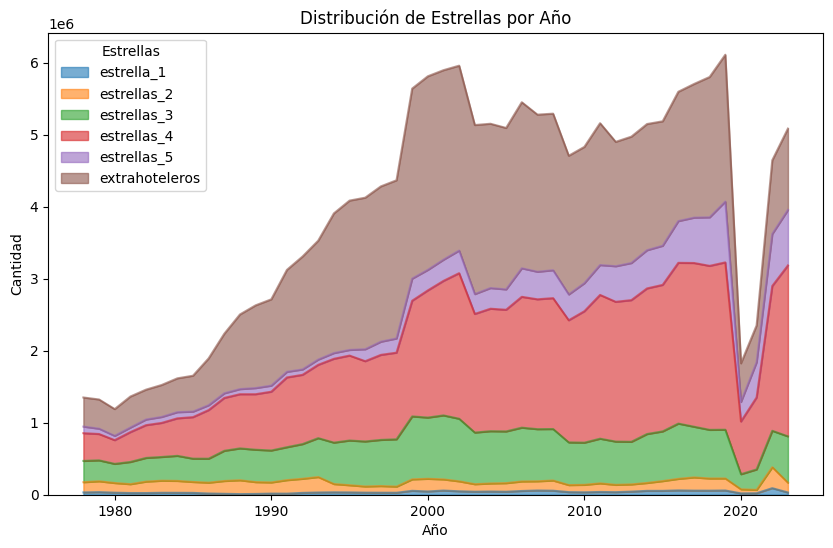

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
df_solo_hoteles.set_index('annio').plot.area(ax=ax, alpha=0.6)
# Configurar el gráfico
ax.set_title('Distribución de Estrellas por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
plt.legend(title='Estrellas')
plt.show()

In [16]:
df_solo_hoteles['total'] = df_solo_hoteles['estrella_1'] + df_solo_hoteles['estrellas_2'] + df_solo_hoteles['estrellas_3'] \
	  + df_solo_hoteles['estrellas_4'] + df_solo_hoteles['estrellas_5'] + df_solo_hoteles['extrahoteleros']
df_solo_hoteles['estrella_1_prop'] = df_solo_hoteles['estrella_1'] / df_solo_hoteles['total']
df_solo_hoteles['estrellas_2_prop'] = df_solo_hoteles['estrellas_2'] / df_solo_hoteles['total']
df_solo_hoteles['estrellas_3_prop'] = df_solo_hoteles['estrellas_3'] / df_solo_hoteles['total']
df_solo_hoteles['estrellas_4_prop'] = df_solo_hoteles['estrellas_4'] / df_solo_hoteles['total']
df_solo_hoteles['estrellas_5_prop'] = df_solo_hoteles['estrellas_5'] / df_solo_hoteles['total']
df_solo_hoteles['extrahoteleros_prop'] = df_solo_hoteles['extrahoteleros'] / df_solo_hoteles['total']
df_solo_hoteles.drop(columns=['estrella_1', 'estrellas_2', 'estrellas_3', 'estrellas_4', 'estrellas_5', 'extrahoteleros', 'total'], inplace=True)

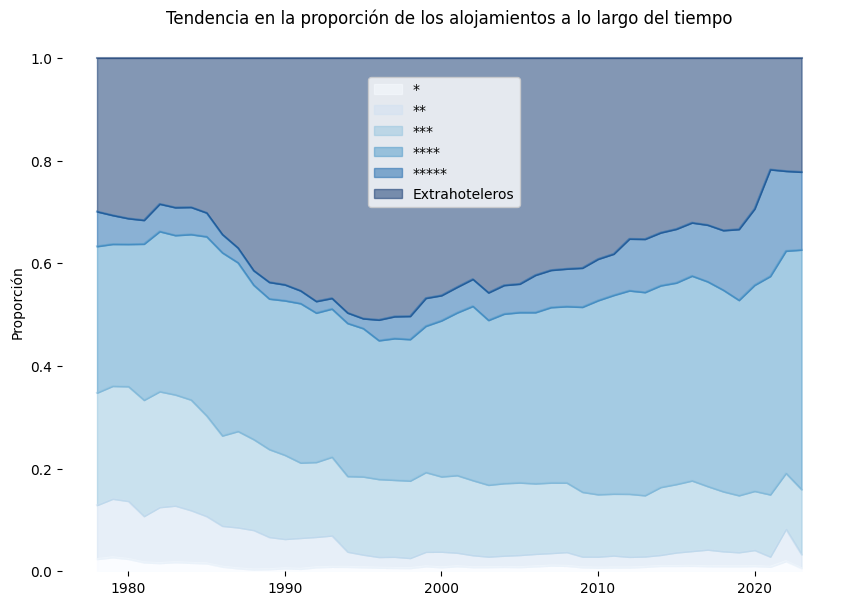

In [17]:
# Configurar el tamaño del gráfico y los ejes
fig, ax = plt.subplots(figsize=(10, 7))

# Graficar el área
df_solo_hoteles.set_index('annio').plot.area(ax=ax, alpha=0.5, colormap='Blues')

# Configurar el título y etiquetas de los ejes
ax.set_title('Tendencia en la proporción de los alojamientos a lo largo del tiempo')
ax.set_ylabel('Proporción')
ax.set_xlabel('')

# Configurar la leyenda
handles, labels = ax.get_legend_handles_labels()
labels = ['*', '**', '***', '****', '*****', 'Extrahoteleros']
ax.legend(handles, labels, bbox_to_anchor=(0.6, 0.93))


# Mostrar el gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [18]:
df_2023_procedencia = df1.copy()

df_2023_procedencia = df_2023_procedencia.drop(columns=['mes', 'fecha','estrella_1', 'estrellas_2', 'estrellas_3', 'estrellas_4', 'estrellas_5', 'hoteleros', 'extrahoteleros'])


In [19]:
df_ridge_plot = df_2023_procedencia.copy()
total_anual = df_ridge_plot.groupby(['annio', 'procedencia'])['total'].sum().reset_index()
total_anual.rename(columns={'total': 'total_anual'}, inplace=True)

# Unir los totales anuales al DataFrame original
df_ridge_plot = df_ridge_plot.merge(total_anual, on=['annio', 'procedencia'])

# Calcular la proporción
df_ridge_plot['valor_prop'] = df_ridge_plot['total'] / df_ridge_plot['total_anual']

# Crear el nuevo DataFrame sin la columna 'total' y con la columna 'valor_prop'
df_ridge_plot = df_ridge_plot.drop(columns=['total'])
df_ridge_plot.rename(columns={'valor_prop': 'valor_prop'}, inplace=True)

df_ridge_plot.sort_values(by = ['total_anual'], ascending = False, inplace = True)
df_ridge_plot['valor_prop'] = df_ridge_plot['valor_prop'] * 10
df_ridge_plot

,annio,procedencia,total_anual,valor_prop
9828,2019,Gran Bretaña,2156924,0.836863
9848,2019,Gran Bretaña,2156924,0.859163
9708,2019,Gran Bretaña,2156924,0.840132
9728,2019,Gran Bretaña,2156924,0.920542
9748,2019,Gran Bretaña,2156924,0.926097
...,...,...,...,...
231,1979,Canada,857,1.598600
411,1979,Canada,857,0.980163
303,1979,Canada,857,0.606768
393,1979,Canada,857,0.595099


In [20]:
# Buble map
df_bubble = df_agg_annio_procedencia.copy()
df_bubble = df_bubble[(df_bubble['annio'] >= 2015) & (df_bubble['annio'] <= 2019)].sort_values(by='total', ascending=False)

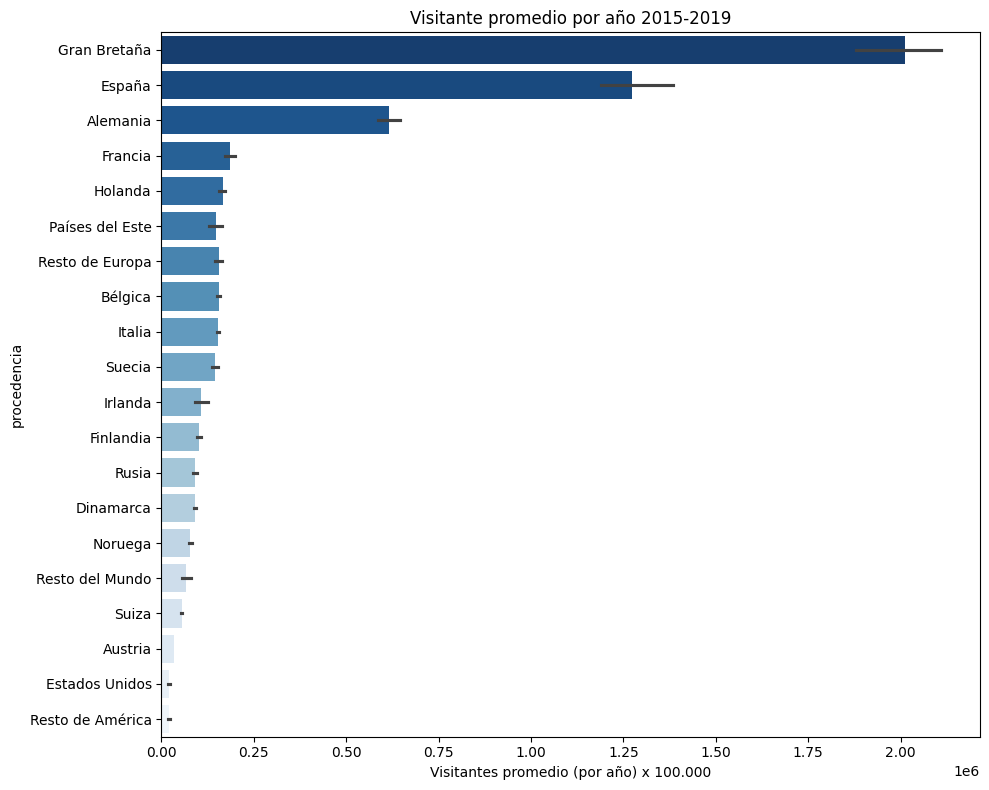

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste de tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el gráfico de barras horizontales
sns.barplot(x='total', y='procedencia', hue='procedencia', data=df_bubble, palette='Blues_r', dodge=False, legend=False)

# Añadir títulos y etiquetas
plt.title('Visitante promedio por año 2015-2019')
plt.xlabel('Visitantes promedio (por año) x 100.000')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor visualización

plt.tight_layout()  # Ajustar el diseño para evitar que se superpongan los elementos
plt.show()


In [46]:
import pandas as pd
import plotly.express as px

# Paises secundarios (Sin UK, España y Alemanía)
data = {
    'procedencia': ['Austria', 'Belgium', 'Denmark', 'United States', 'Finland', 'France', 'Netherlands', 'Ireland' , 'Italy', 'Norway', 'Eastern Countries', 'Rest of America', 'Rest of Europe', 'Rest of the World', 'Russia', 'Sweden', 'Switzerland'],
    'total': [172081, 777378, 454905, 102593, 512799, 927480, 828255, 538900, 765337, 391921, 740550, 101847, 778510, 337648, 454169, 729079, 272661]
}

df = pd.DataFrame(data)

# Crear el choropleth map
fig = px.choropleth(
    df,
    locations='procedencia',  # Nombre de la columna con los nombres de los países
    locationmode='country names',  # Indica que los nombres de los países están en formato de nombres comunes
    color='total',  # Nombre de la columna con los valores a usar para colorear
    color_continuous_scale=px.colors.sequential.Blues,  # Escala de color
    title='',
    labels={'total': 'Total de turistas'}  # Etiqueta para la leyenda
)

fig.update_geos(visible = False, showcountries=False, projection_type='natural earth')
fig.show()


In [23]:
# Treemap
df_2023 = df_agg_annio.loc[df_solo_hoteles['annio'] == 2023]
df_2023.reset_index(drop=True, inplace=True)
df_2023

,annio,estrella_1,estrellas_2,estrellas_3,estrellas_4,estrellas_5,hoteleros,extrahoteleros,total
0,2023,30926,135953,643632,2373549,771110,3955170,1129532,5084702


In [24]:
values = [
    df_2023['estrella_1'][0], 
    df_2023['estrellas_2'][0], 
    df_2023['estrellas_3'][0], 
    df_2023['estrellas_4'][0], 
    df_2023['estrellas_5'][0], 
    df_2023['extrahoteleros'][0]
]
labels = ['1 Estrella', '2 Estrellas', '3 Estrellas', '4 Estrellas', '5 Estrellas', 'Extrahoteleros']
fig = px.treemap(
    names=labels,
    parents=['']*len(labels),
    values=values,
	title='Proporción de turistas por tipo de alojamiento en 2023',
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=45, l=0, r=0, b=0))
fig.show()

In [25]:
df_agg_annio

,annio,estrella_1,estrellas_2,estrellas_3,estrellas_4,estrellas_5,hoteleros,extrahoteleros,total
0,1978,32098,141897,295572,385190,91454,946211,404174,1350385
1,1979,36024,150689,290591,365786,74243,917333,405528,1322861
2,1980,28509,134153,265681,329550,59658,817551,371984,1189535
3,1981,23584,122885,308363,414637,63116,932585,431015,1363600
4,1982,23293,158863,328906,455108,78163,1044333,415119,1459452
5,1983,27030,167601,329576,473126,82699,1080032,444059,1524091
6,1984,26570,165398,348000,520750,85725,1146443,469949,1616392
7,1985,25461,151730,323527,576744,76704,1154166,498591,1652757
8,1986,16899,150449,332892,675148,67540,1242928,650858,1893786
9,1987,12687,178094,419130,734348,64526,1408785,827276,2236061


In [26]:
# con datos para 2023 de los primeros 6 paises. 
# eliminamos todas las columnas excepto mes, procedencia y total. Reiniciamos indice
df_2023_procedencia = df1.loc[df1['annio'] == 2023].copy()
df_2023_procedencia.drop(columns=['fecha', 'estrella_1', 'estrellas_2', 'estrellas_3', 'estrellas_4', 'estrellas_5', 'hoteleros', 'extrahoteleros'], inplace=True)
df_2023_procedencia.reset_index(drop=True, inplace=True)

df_2023_procedencia

,annio,mes,procedencia,total
0,2023,1,España,53725
1,2023,1,Holanda,12090
2,2023,1,Bélgica,11906
3,2023,1,Alemania,38022
4,2023,1,Francia,14830
...,...,...,...,...
235,2023,12,Países del Este,17500
236,2023,12,Resto de Europa,17116
237,2023,12,Estados Unidos,2800
238,2023,12,Resto de América,1770


In [27]:
df_ridge_plot = df_2023_procedencia.copy()
total_anual = df_ridge_plot.groupby(['annio', 'procedencia'])['total'].sum().reset_index()
total_anual.rename(columns={'total': 'total_anual'}, inplace=True)

# Unir los totales anuales al DataFrame original
df_ridge_plot = df_ridge_plot.merge(total_anual, on=['annio', 'procedencia'])

# Calcular la proporción
df_ridge_plot['valor_prop'] = df_ridge_plot['total'] / df_ridge_plot['total_anual']

# Crear el nuevo DataFrame sin la columna 'total' y con la columna 'valor_prop'
df_ridge_plot = df_ridge_plot.drop(columns=['total'])
df_ridge_plot.rename(columns={'valor_prop': 'valor_prop'}, inplace=True)

df_ridge_plot.sort_values(by = ['total_anual'], ascending = False, inplace = True)
df_ridge_plot['valor_prop'] = df_ridge_plot['valor_prop'] * 10
df_ridge_plot

,annio,mes,procedencia,total_anual,valor_prop
145,2023,8,Gran Bretaña,1900565,0.913981
225,2023,12,Gran Bretaña,1900565,0.834852
45,2023,3,Gran Bretaña,1900565,0.830058
205,2023,11,Gran Bretaña,1900565,0.816384
5,2023,1,Gran Bretaña,1900565,0.653143
...,...,...,...,...,...
54,2023,3,Rusia,9136,0.899737
34,2023,2,Rusia,9136,0.860333
194,2023,10,Rusia,9136,0.993870
174,2023,9,Rusia,9136,0.515543


In [28]:
df_ridge_plot = df_2023_procedencia.copy()
total_anual = df_ridge_plot.groupby(['annio', 'procedencia'])['total'].sum().reset_index()
total_anual.rename(columns={'total': 'total_anual'}, inplace=True)

# Unir los totales anuales al DataFrame original
df_ridge_plot = df_ridge_plot.merge(total_anual, on=['annio', 'procedencia'])

# Calcular la proporción
df_ridge_plot['valor_prop'] = df_ridge_plot['total'] / df_ridge_plot['total_anual']

# Crear el nuevo DataFrame sin la columna 'total' y con la columna 'valor_prop'
df_ridge_plot = df_ridge_plot.drop(columns=['total'])
df_ridge_plot.rename(columns={'valor_prop': 'valor_prop'}, inplace=True)

df_ridge_plot.sort_values(by = ['total_anual'], ascending = False, inplace = True)
df_ridge_plot['valor_prop'] = df_ridge_plot['valor_prop'] * 10
df_ridge_plot

,annio,mes,procedencia,total_anual,valor_prop
145,2023,8,Gran Bretaña,1900565,0.913981
225,2023,12,Gran Bretaña,1900565,0.834852
45,2023,3,Gran Bretaña,1900565,0.830058
205,2023,11,Gran Bretaña,1900565,0.816384
5,2023,1,Gran Bretaña,1900565,0.653143
...,...,...,...,...,...
54,2023,3,Rusia,9136,0.899737
34,2023,2,Rusia,9136,0.860333
194,2023,10,Rusia,9136,0.993870
174,2023,9,Rusia,9136,0.515543


# Descubro que un ridge plot solo representa la frecuencia que se repite un valor. No para lo que quiero

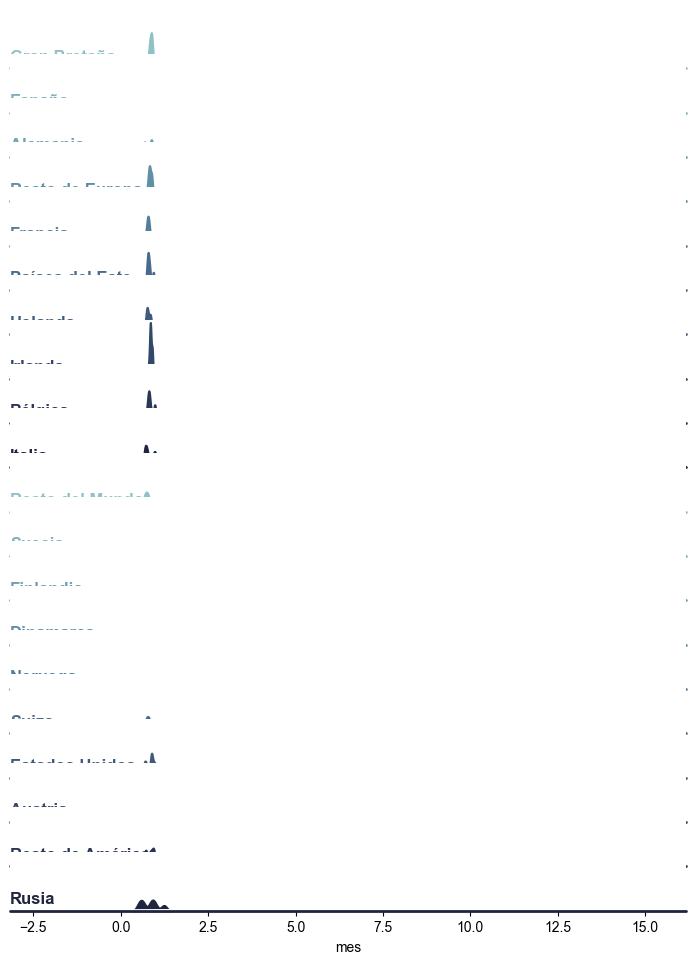

In [29]:
# Descubro que un ridge plot solo representa la frecuencia que se repite un valor. No para lo que quiero
df = df_ridge_plot
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df_ridge_plot, row="procedencia", hue="procedencia", aspect=15, height=.5, palette=pal)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Draw the densities in a few steps
g.map(sns.kdeplot, "valor_prop",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "mes", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "mes")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [30]:
# DF para visualización en espiral
df_espiral = df1.copy()
df_espiral.drop(columns=['estrella_1', 'estrellas_2', 'estrellas_3', 'estrellas_4', 'estrellas_5', 'hoteleros', 'extrahoteleros'], inplace=True)
df_espiral = df_espiral[df_espiral['procedencia'].isin(['Gran Bretaña', 'Francia', 'España'])]
df_espiral = df_espiral[df_espiral['annio'].isin([2022, 2023])].reset_index()
df_espiral


,index,annio,mes,fecha,procedencia,total
0,10323,2022,1,2022-01-01,España,44672
1,10327,2022,1,2022-01-01,Francia,10380
2,10328,2022,1,2022-01-01,Gran Bretaña,70906
3,10343,2022,2,2022-02-01,España,57732
4,10347,2022,2,2022-02-01,Francia,17309
...,...,...,...,...,...,...
67,10767,2023,11,2023-11-01,Francia,13755
68,10768,2023,11,2023-11-01,Gran Bretaña,155159
69,10783,2023,12,2023-12-01,España,73097
70,10787,2023,12,2023-12-01,Francia,15858


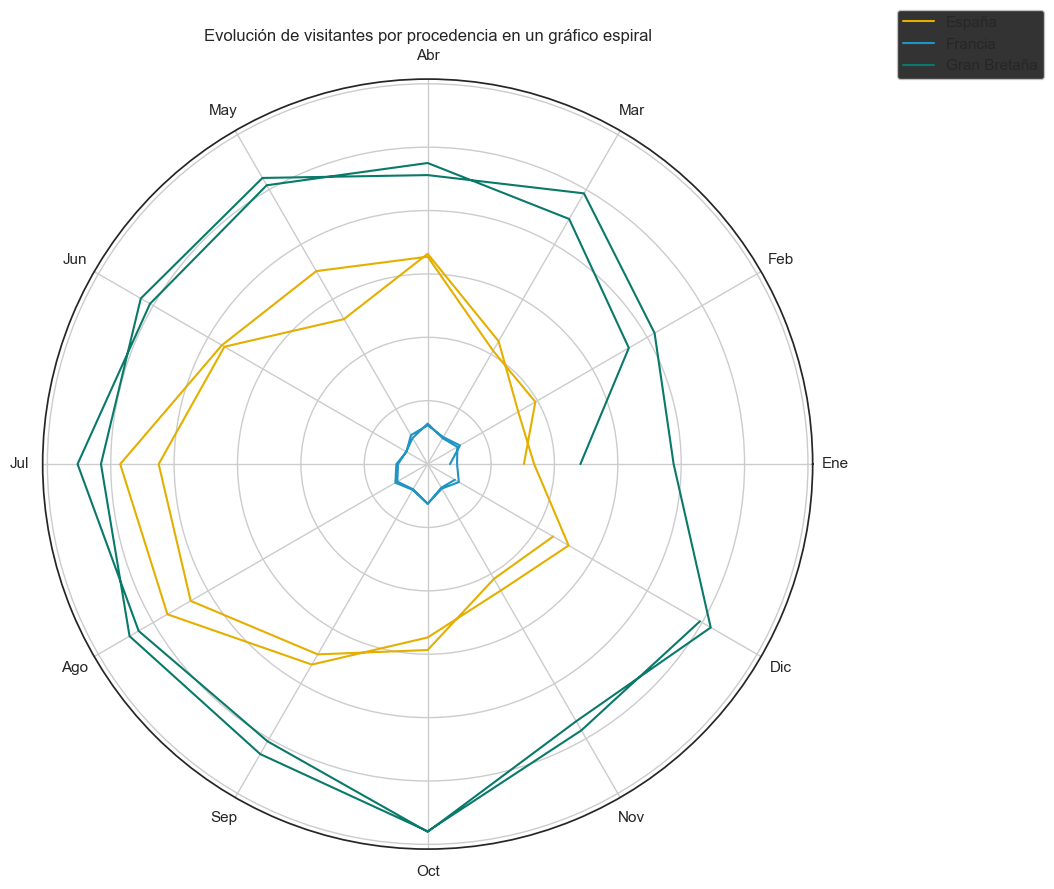

    index  annio  mes      fecha   procedencia   total  total_prop     angle
0   10323   2022    1 2022-01-01        España   44672    0.015181  0.000000
1   10327   2022    1 2022-01-01       Francia   10380    0.003528  0.000000
2   10328   2022    1 2022-01-01  Gran Bretaña   70906    0.024097  0.000000
3   10343   2022    2 2022-02-01        España   57732    0.019620  0.523599
4   10347   2022    2 2022-02-01       Francia   17309    0.005882  0.523599
..    ...    ...  ...        ...           ...     ...         ...       ...
67  10767   2023   11 2023-11-01       Francia   13755    0.004300  5.235988
68  10768   2023   11 2023-11-01  Gran Bretaña  155159    0.048509  5.235988
69  10783   2023   12 2023-12-01        España   73097    0.022853  5.759587
70  10787   2023   12 2023-12-01       Francia   15858    0.004958  5.759587
71  10788   2023   12 2023-12-01  Gran Bretaña  158669    0.049606  5.759587

[72 rows x 8 columns]


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = df_espiral.copy()

# Preparar los datos
df['total_prop'] = df.groupby('annio')['total'].transform(lambda x: x / x.sum())

# Mapear cada procedencia a un color (tonos de azul)
colors = {
    'España': '#e4af00',
    'Francia': '#2094c3',
    'Gran Bretaña': '#097969'
}

# Convertir meses en ángulos (radianes)
df['angle'] = (df['mes'] - 1) * (2 * np.pi / 12)

# Crear el gráfico en espiral
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 10))

# Graficar cada procedencia por separado
for country in df['procedencia'].unique():
    df_country = df[df['procedencia'] == country]
    angles = df_country['angle'].values
    total_props = df_country['total_prop'].values

    ax.plot(angles, total_props, label=country, color=colors[country])

# Añadir etiquetas y título
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax.set_yticklabels([])

# Añadir leyenda fuera del gráfico
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1))

plt.title('Evolución de visitantes por procedencia en un gráfico espiral')
plt.show()
print(df)


In [39]:
df_espiral_2 = df1.copy()

total_anual = df_espiral_2.copy()
total_anual = total_anual.groupby(['annio', 'procedencia'])['total'].sum().reset_index()
total_anual.rename(columns={'total': 'total_anual'}, inplace=True)

df_espiral_2.drop(columns=['estrella_1', 'estrellas_2', 'estrellas_3', 'estrellas_4', 'estrellas_5', 'hoteleros', 'extrahoteleros'], inplace=True)
df_espiral_2 = df_espiral_2[df_espiral_2['procedencia'].isin(['Gran Bretaña', 'Suecia', 'España', 'Italia', 'Alemania', 'Rusia'])]
df_espiral_2 = df_espiral_2[df_espiral_2['annio'].isin([2022, 2023])].reset_index()
total_anual.rename(columns={'total': 'total_anual'}, inplace=True)
df_espiral_2 = df_espiral_2.merge(total_anual, on=['annio', 'procedencia'])
df_espiral_2['valor_prop'] = df_espiral_2['total'] / df_espiral_2['total_anual']
df_espiral_2 = df_espiral_2.drop(columns=['total'])
df_espiral_2.rename(columns={'valor_prop': 'total'}, inplace=True)


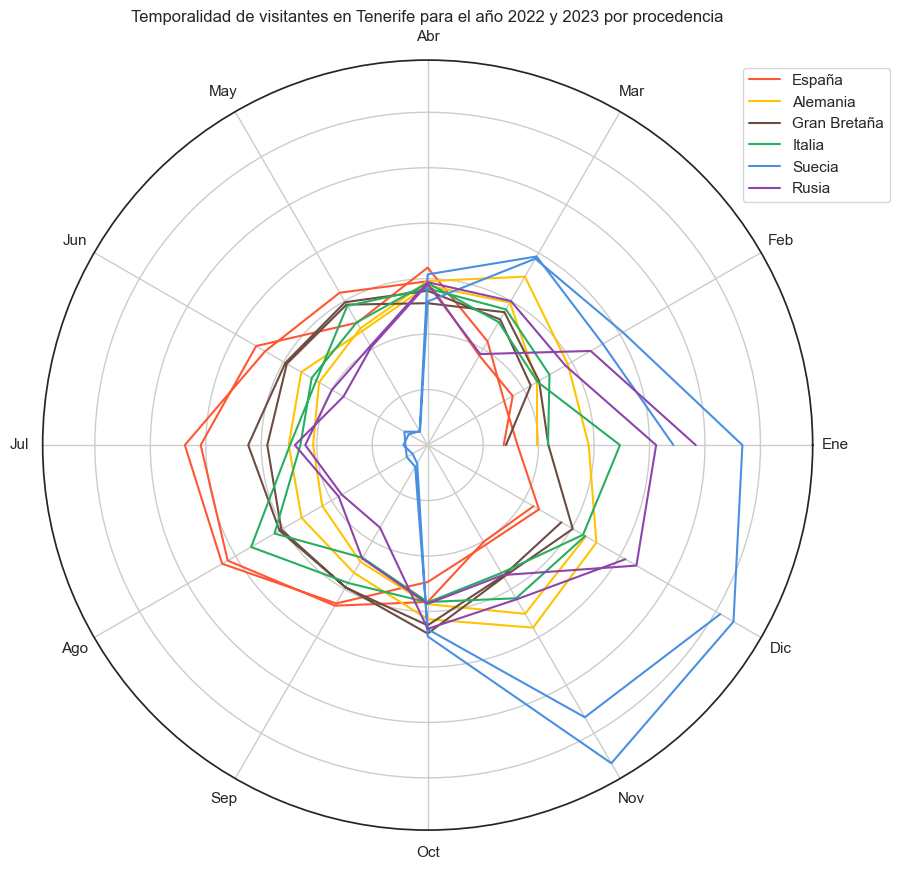

In [52]:
df = df_espiral_2.copy()
# Preparar los datos
df['total_prop'] = df.groupby('annio')['total'].transform(lambda x: x / x.sum())

# Mapear cada procedencia a un color (tonos de azul)
colors = {
    'España': '#FF5733',
    'Suecia': '#4A90E2',
    'Gran Bretaña': '#6D4C41',
    'Rusia': '#8E44AD',
    'Alemania': '#FFC300',
    'Italia': '#27AE60'
}

# Convertir meses en ángulos (radianes)
df['angle'] = (df['mes'] - 1) * (2 * np.pi / 12)

# Crear el gráfico en espiral
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 10))

# Graficar cada procedencia por separado
for country in df['procedencia'].unique():
    df_country = df[df['procedencia'] == country]
    angles = df_country['angle'].values
    total_props = df_country['total_prop'].values

    ax.plot(angles, total_props, label=country, color=colors[country])

# Añadir etiquetas y título
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax.set_yticklabels([])

# Añadir leyenda fuera del gráfico
ax.legend(loc='upper left', bbox_to_anchor=(0.9, 1),facecolor='white')

plt.title('Temporalidad de visitantes en Tenerife para el año 2022 y 2023 por procedencia')
plt.show()
